In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Задание 1

In [2]:
with np.load('data_7_1.npz') as data:
  x1, y1 = data['x1'], data['y1']

In [3]:
from scipy.interpolate import CubicSpline, PchipInterpolator

In [4]:
class LagrangeInterpolator:
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        polynomial = 0
        
        for i in range(len(self.xk)):
          l_i = self.yk[i]
          x_i = self.xk[i]
          for x_j in self.xk:
            if x_j != x_i:
              l_i *= (x - x_j)/(x_i - x_j)
          polynomial += l_i
        
        return polynomial

In [5]:
print(min(x1), max(x1))

0.0 9778.0


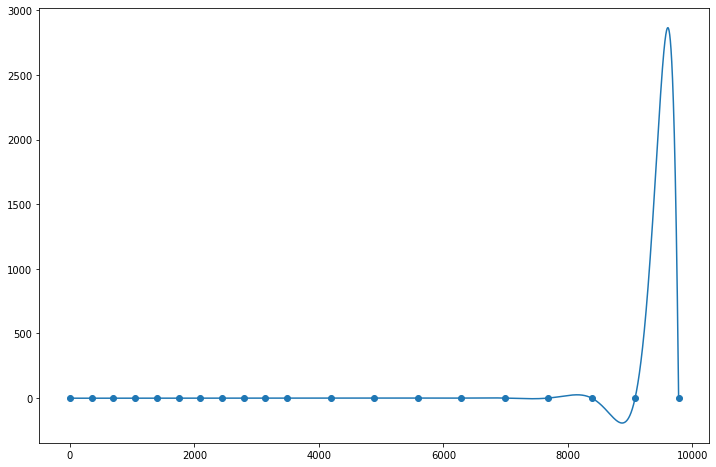

In [6]:
li = LagrangeInterpolator(x1, y1)
xx = np.linspace(0, 9778, 10000)

plt.figure(figsize=(12, 8))
plt.plot(xx, li(xx))
plt.scatter(x1, y1)

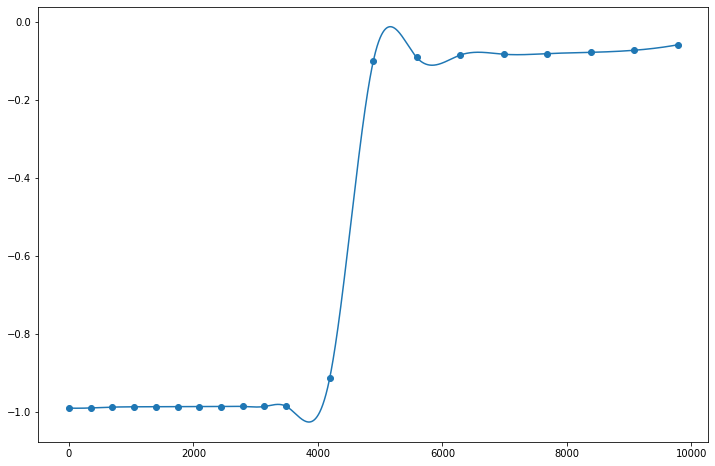

In [7]:
cs = CubicSpline(x1, y1)
xx = np.linspace(0, 9778, 10000)

plt.figure(figsize=(12, 8))
plt.plot(xx, cs(xx))
plt.scatter(x1, y1)

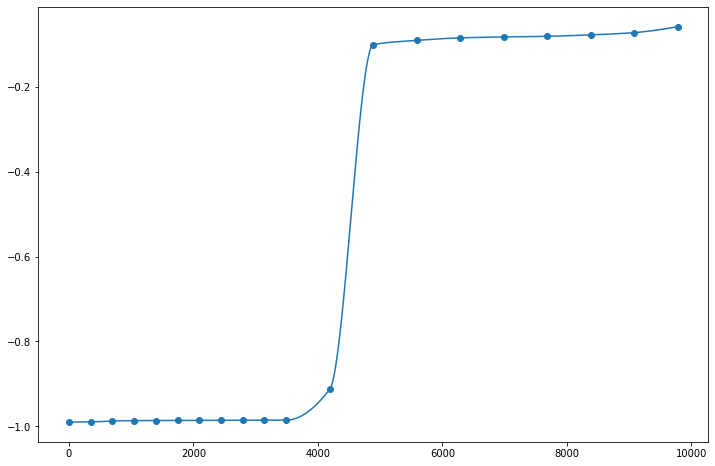

In [8]:
pchip = PchipInterpolator(x1, y1)
xx = np.linspace(0, 9778, 10000)

plt.figure(figsize=(12, 8))
plt.plot(xx, pchip(xx))
plt.scatter(x1, y1)

# Задание 2

n = 16


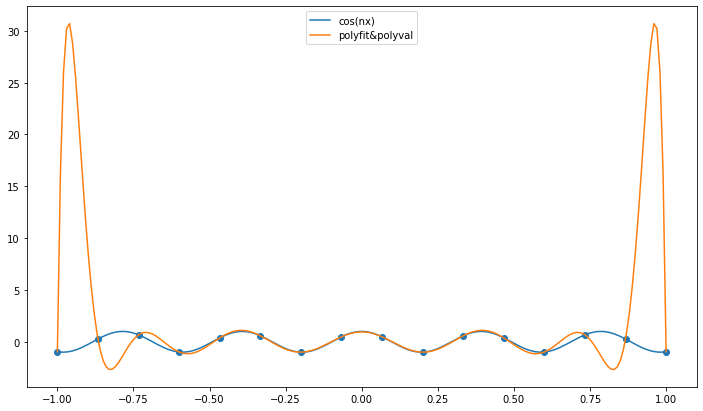

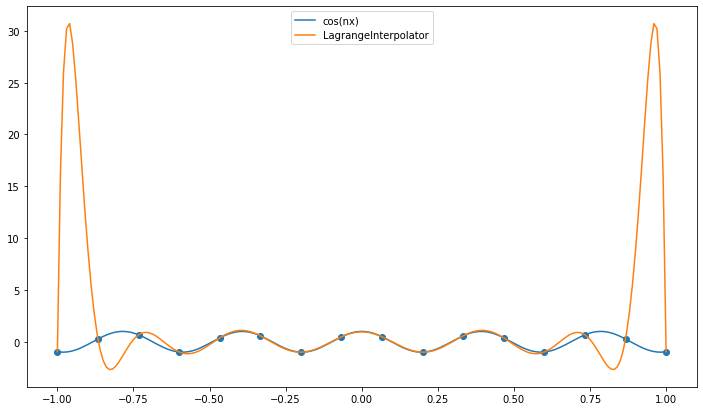





n = 32


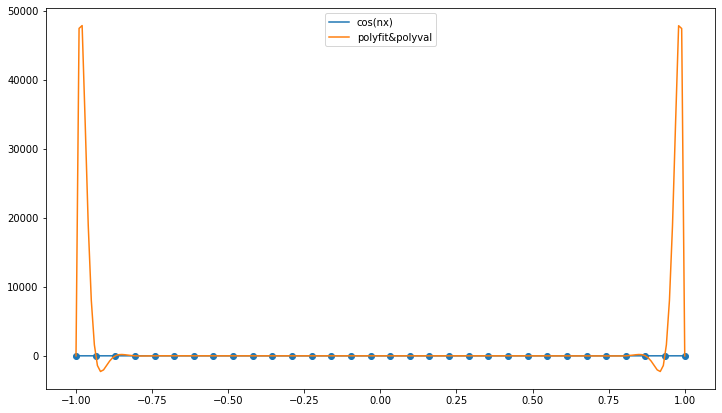

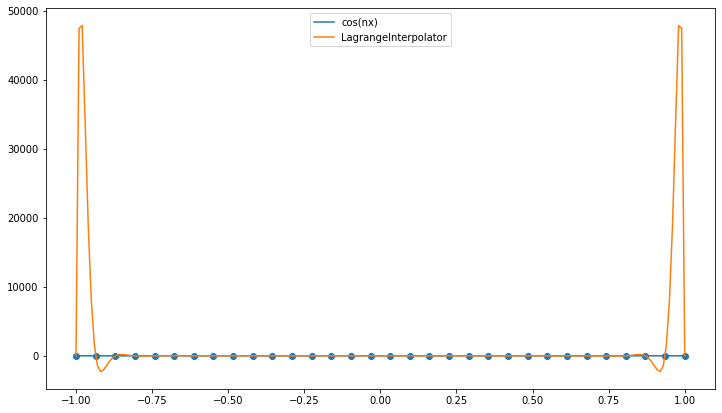





n = 64


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


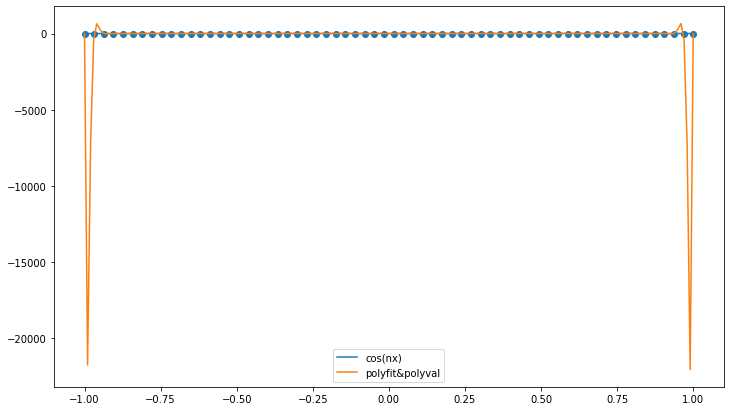

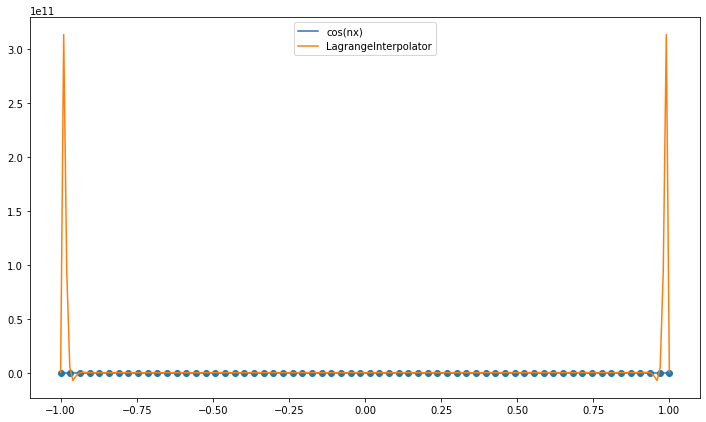

In [9]:
xx = np.linspace(-1, 1, 200)
for n in [16, 32, 64]:
  print('n =', n)
  x = np.linspace(-1, 1, n)
  y = np.cos(n * x)
  
  li = LagrangeInterpolator(x, y)
  polynomial = np.polyfit(x, y, n-1)
  
  for values, name in [(np.polyval(polynomial, xx), 'polyfit&polyval'),
                       (li(xx), 'LagrangeInterpolator')]:
    plt.figure(figsize=(12, 7))
    plt.scatter(x, y)

    plt.plot(xx, np.cos(n * xx), label='cos(nx)')
    plt.plot(xx, values, label=name)

    plt.legend()
    plt.show()
    print()
  
  print('\n\n')

# Задание 3

In [10]:
from scipy.optimize import curve_fit

In [11]:
with np.load('data_7_1.npz') as data:
  x4, y4 = data['x4'], data['y4']

In [12]:
y_1 = lambda x, p_0, p_1, p_2, p_3, p_4, p_5: \
p_0 + p_1*x + p_2*x**2 + p_3*x**3 + p_4*x**4 + p_5*x**5

y_2 = lambda x, p_0, p_1, p_2, p_3, q_1, q_2: \
(p_0 + p_1*x + p_2*x**2 + p_3*x**3)/(1 + q_1*x + q_2*x**2)

curve1, _ = curve_fit(y_1, x4, y4)
curve2, _ = curve_fit(y_2, x4, y4)

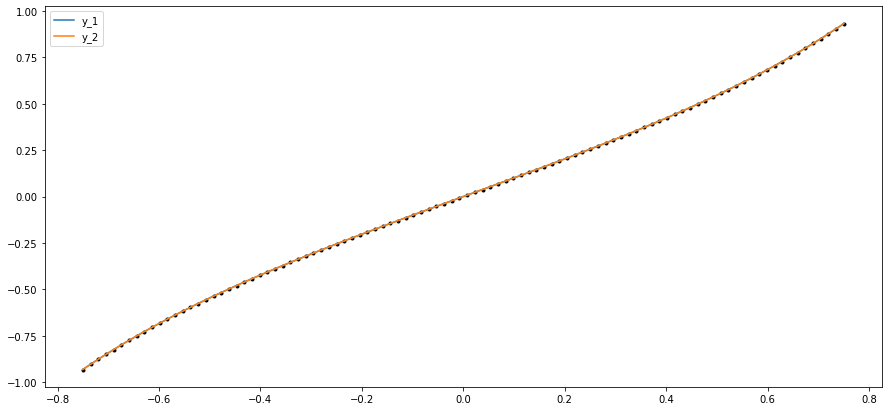

In [13]:
x = np.linspace(-0.75, 0.75, 100)
plt.figure(figsize=(15, 7))

plt.plot(x, y_1(x, *curve1), label='y_1')
plt.plot(x, y_2(x, *curve2), label='y_2')
plt.scatter(x4, y4, color='black', s=9)

plt.legend()
plt.show()

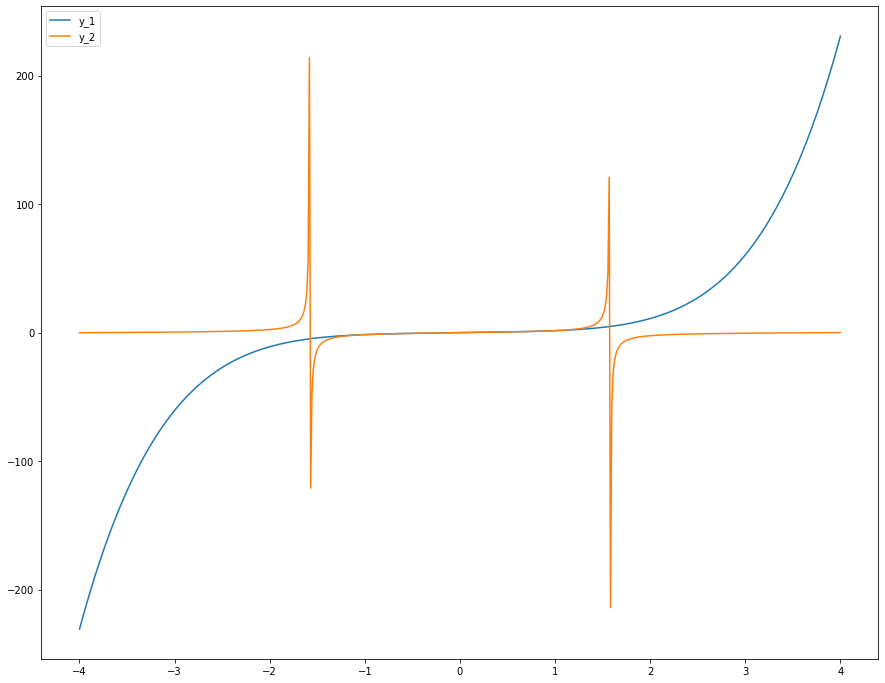

In [14]:
x = np.linspace(-4, 4, 600)
plt.figure(figsize=(15, 12))

plt.plot(x, y_1(x, *curve1), label='y_1')
plt.plot(x, y_2(x, *curve2), label='y_2')

plt.legend()
plt.show()

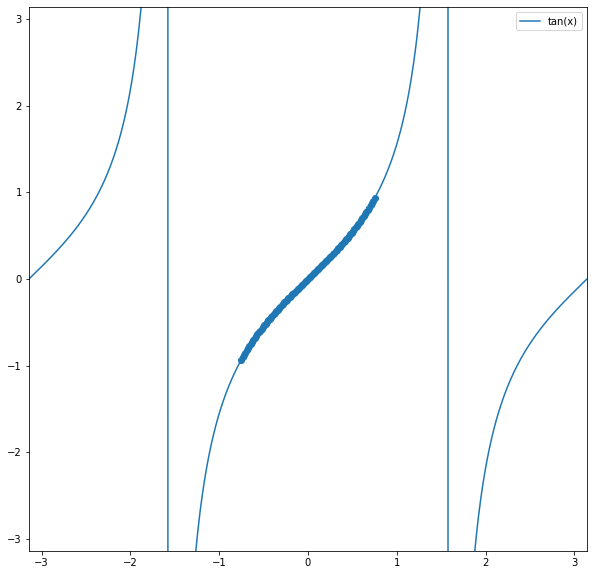

In [15]:
x = np.linspace(-np.pi, np.pi, 500)
plt.figure(figsize=(10, 10))

plt.scatter(x4, y4)
plt.plot(x, np.tan(x), label='tan(x)')

plt.legend()
plt.ylim((-np.pi, np.pi))
plt.xlim((-np.pi, np.pi))
plt.show()

# Задание 4

In [16]:
N = 20
x = np.linspace(-2, 2, N)
y = np.exp(x) * x**2

h = np.diff(x)
delta_a = np.diff(y)
A = np.zeros((N,N))
b = np.zeros(N)

A[0, 0] = 2*(h[0] + h[1])
A[0, 1] = h[1]
A[0, -1] = h[0]
b[0] = 3*(y[2]-y[1])/h[1]-3*(y[1]-y[0])/h[0]

for i in range(1,N-1):
    A[i, i-1] = h[i-1]
    A[i, i] = 2*(h[i-1] + h[i])
    A[i, i+1] = h[i]
    b[i] = 3*(delta_a[i]/h[i] - delta_a[i-1]/h[i-1])

A[-1, -1] = 2*(h[-2] + h[-1])
A[-1, -2] = h[-2]
A[-1, 0] = h[1]
b[-1] = 3*(y[-1]-y[-2])/h[-1]-3*(y[-2]-y[-3])/h[-2]

c = np.linalg.solve(A, b)
a = y
d = np.zeros((N-1,1))
b = np.zeros((N-1,1))
for i in range(0,len(d)):
    b[i] = (delta_a[i] / h[i]) - (h[i]/3) * (2*c[i] + c[i + 1])
    d[i] = (c[i+1] - c[i]) / (3*h[i])

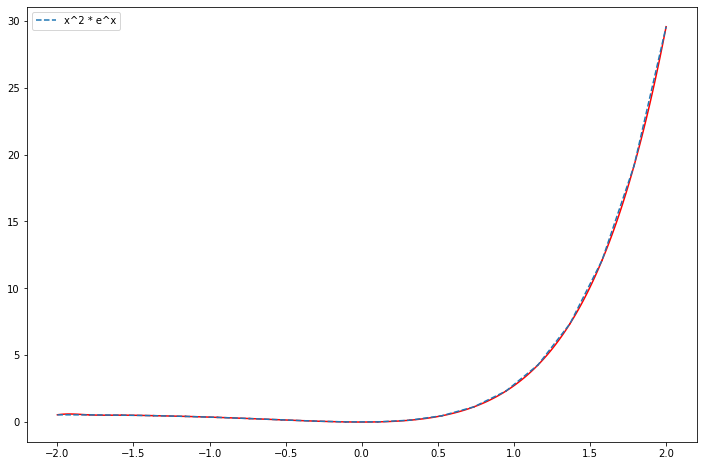

In [17]:
plt.figure(figsize=(12, 8))
for i in range(N-1):
  xx = np.linspace(x[i], x[i + 1], 100)
  polynomial = lambda t: a[i] + b[i]*(t - x[i]) + c[i]*(t - x[i])**2 + d[i]*(t - x[i])**3
  plt.plot(xx, polynomial(xx), color='red')

plt.plot(x, y, '--', label='x^2 * e^x')
plt.legend()
plt.show()

# Задание 5

In [18]:
from scipy.linalg import solve_banded

In [19]:
def optimized_solve(A, u, v, b):
  N = len(A)
  ab = np.zeros((3, N))

  ab[1, 0] = A[0, 0]
  ab[2, 0] = A[0, 1]

  for i in range(1, N-1):
    ab[0, i] = A[i - 1, i]
    ab[1, i] = A[i, i]
    ab[2, i] = A[i + 1, i]

  ab[0, -1] = A[-2, -1]
  ab[1, -1] = A[-1, -1]
  
  return solve_banded((1, 1), ab, b) - \
          solve_banded((1, 1), ab, u) @ solve_banded((1, 1), ab, v).T /\
          (1 + v.T @ solve_banded((1, 1), ab, u))

In [20]:
N = 20
x = np.linspace(-2, 2, N)
y = np.exp(x) * x**2

h = np.diff(x)
delta_a = np.diff(y)
A = np.zeros((N,N))
b = np.zeros(N)

A[0, 0] = 2*(h[0] + h[1])
A[0, 1] = h[1]
b[0] = 3*(y[2]-y[1])/h[1]-3*(y[1]-y[0])/h[0]

for i in range(1,N-1):
    A[i, i-1] = h[i-1]
    A[i, i] = 2*(h[i-1] + h[i])
    A[i, i+1] = h[i]
    b[i] = 3*(delta_a[i]/h[i] - delta_a[i-1]/h[i-1])

A[-1, -1] = 2*(h[-2] + h[-1])
A[-1, -2] = h[-2]
b[-1] = 3*(y[-1]-y[-2])/h[-1]-3*(y[-2]-y[-3])/h[-2]

u = np.zeros(N)
v = np.zeros(N)
u[0] = v[-1] = np.sqrt(h[0])
u[-1] = v[0] = np.sqrt(h[1])
A[0, 0] -= np.sqrt(h[0]) * np.sqrt(h[1])
A[-1, -1] -= np.sqrt(h[0]) * np.sqrt(h[1])

c = optimized_solve(A, u, v, b)
a = y
d = np.zeros((N-1,1))
b = np.zeros((N-1,1))
for i in range(0,len(d)):
    b[i] = (delta_a[i] / h[i]) - (h[i]/3) * (2*c[i] + c[i + 1])
    d[i] = (c[i+1] - c[i]) / (3*h[i])

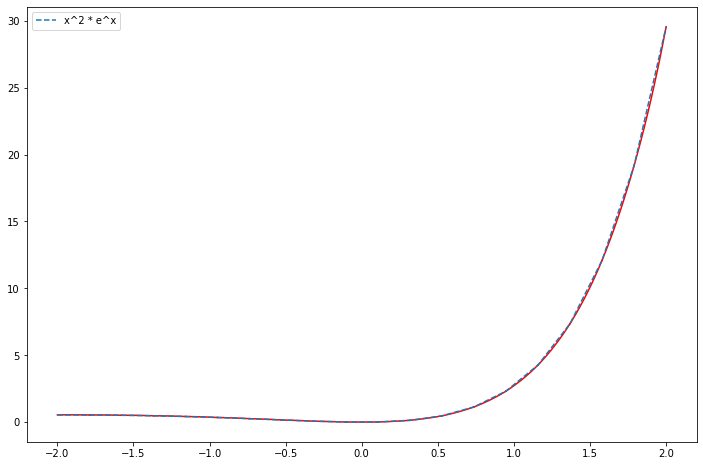

In [21]:
plt.figure(figsize=(12, 8))
for i in range(N-1):
  xx = np.linspace(x[i], x[i + 1], 100)
  polynomial = lambda t: a[i] + b[i]*(t - x[i]) + c[i]*(t - x[i])**2 + d[i]*(t - x[i])**3
  plt.plot(xx, polynomial(xx), color='red')

plt.plot(x, y, '--', label='x^2 * e^x')
plt.legend()
plt.show()